Graphs for Fig 4, model panels

Test noise: 1, 2, 4, 8, 16, 32, 64...

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from skmisc.loess import loess
from scipy.signal import find_peaks
import datetime, warnings

%matplotlib inline
warnings.simplefilter(action='ignore')

In [24]:
'''# Setup - test auxin noise on pattern robustness
s = 'a'
noise_levels = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5]

path_UTGeff_single = '../out_batch/MANUSCRIPT_UTGeff_ref_single/'
path_UTGeff_multi = '../out_batch/MANUSCRIPT_UTGeff_AUXINnoise_multi/'

UTGeff_single = pd.read_csv(path_UTGeff_single + 'auxin_profile_0_' + s + '.csv').head(13)

data_UTGeff = [
    pd.read_csv(path_UTGeff_single + 'auxin_profile_0_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_2.5_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_5_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_7.5_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_10_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_12.5_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_15_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_17.5_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_20_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_22.5_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_25_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_27.5_' + s + '.csv')
]

path_DUAL_single = '../out_batch/MANUSCRIPT_DUAL_ref_single/'
path_DUAL_multi = '../out_batch/MANUSCRIPT_DUAL_AUXINnoise_multi/'

DUAL_single = pd.read_csv(path_DUAL_single + 'auxin_profile_0_' + s + '.csv').head(13)

data_DUAL = [
    pd.read_csv(path_DUAL_single + 'auxin_profile_0_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_2.5_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_5_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_7.5_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_10_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_12.5_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_15_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_17.5_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_20_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_22.5_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_25_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_27.5_' + s + '.csv')
]'''

"# Setup - test auxin noise on pattern robustness\ns = 'a'\nnoise_levels = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5]\n\npath_UTGeff_single = '../out_batch/MANUSCRIPT_UTGeff_ref_single/'\npath_UTGeff_multi = '../out_batch/MANUSCRIPT_UTGeff_AUXINnoise_multi/'\n\nUTGeff_single = pd.read_csv(path_UTGeff_single + 'auxin_profile_0_' + s + '.csv').head(13)\n\ndata_UTGeff = [\n    pd.read_csv(path_UTGeff_single + 'auxin_profile_0_' + s + '.csv'),\n    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_2.5_' + s + '.csv'),\n    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_5_' + s + '.csv'),\n    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_7.5_' + s + '.csv'),\n    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_10_' + s + '.csv'),\n    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_12.5_' + s + '.csv'),\n    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_15_' + s + '.csv'),\n    pd.read_csv(path_UTGeff_multi + 'auxin_profile_m

In [25]:
# Setup - test CUC noise on pattern robustness
s = 'a'
noise_levels = [0, 5, 10, 15]

path_UTGeff_single = '../out_batch/MANUSCRIPT_UTGeff_ref_single/'
path_UTGeff_multi = '../out_batch/MANUSCRIPT_UTGeff_CUCnoise_multi/'

UTGeff_single = pd.read_csv(path_UTGeff_single + 'auxin_profile_0_' + s + '.csv').head(13)

data_UTGeff = [
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_5_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_10_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_15_' + s + '.csv')
]

path_DUAL_single = '../out_batch/MANUSCRIPT_DUAL_ref_single/'
path_DUAL_multi = '../out_batch/MANUSCRIPT_DUAL_CUCnoise_multi/'

DUAL_single = pd.read_csv(path_DUAL_single + 'auxin_profile_0_' + s + '.csv').head(13)

data_DUAL = [
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_5_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_10_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_15_' + s + '.csv')
]

In [26]:
# Process datasets UTGeff

# Select first 13 rows only (simpler options did not update dfs in list, see: https://stackoverflow.com/questions/49986865/modifying-dataframes-inside-a-list-is-not-working)
for i, df in enumerate(data_UTGeff): data_UTGeff[i] = df.head(13)

# Add key column indicating model
for i, df in enumerate(data_UTGeff): data_UTGeff[i]['model'] = 'UTGeff'

# Add key column indicating noise level
for i, df in enumerate(data_UTGeff): data_UTGeff[i]['noise'] = noise_levels[i]

# Give x values (cell row) to all datasets
data_x = np.linspace(1, len(data_UTGeff[0].index), len(data_UTGeff[0].index))
for i, df in enumerate(data_UTGeff): data_UTGeff[i]['x'] = data_x

# Calculate mean and median of profiles replicates
all_means_UTGeff = [i.drop(columns=['x']).mean(axis=1) for i in data_UTGeff]
all_medians_UTGeff = [i.drop(columns=['x']).median(axis=1) for i in data_UTGeff]

In [27]:
# Process datasets DUAL

# Select first 13 rows only (aimpler options did not update dfs in list, see: https://stackoverflow.com/questions/49986865/modifying-dataframes-inside-a-list-is-not-working)
for i, df in enumerate(data_DUAL): data_DUAL[i] = df.head(13)

# Add key conlumn indicating model
for i, df in enumerate(data_DUAL): data_DUAL[i]['model'] = 'UTGeff'

# Add key column indicating noise level
for i, df in enumerate(data_DUAL): data_DUAL[i]['noise'] = noise_levels[i]

# Give x values (cell row) to all datasets
data_x = np.linspace(1, len(data_DUAL[0].index), len(data_DUAL[0].index))
for i, df in enumerate(data_DUAL): data_DUAL[i]['x'] = data_x

# Calculate mean and median of profiles replicates
all_means_DUAL = [i.drop(columns=['x']).mean(axis=1) for i in data_DUAL]
all_medians_DUAL = [i.drop(columns=['x']).median(axis=1) for i in data_DUAL]

data_DUAL[0]

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,model,noise,x
0,287.917065,284.874507,285.558181,285.260654,286.251647,285.453407,285.019447,286.742406,286.727318,286.476381,...,286.962335,285.623388,287.621438,286.308443,286.023935,286.883791,287.080547,UTGeff,0,1.0
1,245.236701,244.984487,245.111533,244.738540,245.170099,245.131938,244.862259,245.470201,245.293240,245.461946,...,245.516038,245.084508,245.612516,245.089860,245.329168,245.425977,245.600876,UTGeff,0,2.0
2,137.763254,143.139169,143.379085,139.046362,143.001528,144.307411,140.603752,145.576672,144.383201,146.415495,...,145.271523,142.588645,146.132075,141.548135,145.628096,145.382381,145.620066,UTGeff,0,3.0
3,68.514942,71.778084,72.025644,66.545686,69.320111,73.507305,65.655994,73.293592,73.735226,75.203188,...,72.416870,70.224569,70.143547,69.010158,76.095378,73.154649,69.250364,UTGeff,0,4.0
4,34.465025,37.809334,36.888125,26.171857,34.546191,43.169903,27.122381,38.324943,40.362725,42.395994,...,35.960779,37.662298,37.852881,37.985433,46.266906,39.516565,40.295789,UTGeff,0,5.0
5,21.151221,21.799641,17.498106,15.968884,20.769375,23.222040,24.197579,23.343798,24.170089,24.939405,...,25.947641,18.506412,18.494416,28.028891,28.948204,19.476691,20.891822,UTGeff,0,6.0
6,27.025918,34.007026,17.701310,21.928678,18.467340,26.729895,36.630365,23.982290,16.305973,22.677775,...,16.691314,27.938939,21.408101,26.214049,30.169792,17.264494,26.578731,UTGeff,0,7.0
7,37.720186,57.785811,39.728402,39.323812,19.242268,49.048263,58.398316,37.561365,28.987773,33.857308,...,25.409507,48.513235,35.551382,35.503151,48.748338,20.982490,49.922305,UTGeff,0,8.0
8,68.685658,106.499967,69.205939,64.133724,29.559957,98.055440,115.966831,74.380022,54.875397,80.987783,...,52.200614,95.966505,81.151463,67.477500,92.015325,36.767410,105.668870,UTGeff,0,9.0
9,54.409567,72.422547,93.072828,68.395953,33.296057,70.192899,110.744204,80.799971,82.650661,86.396900,...,85.358971,67.778304,61.751160,59.696012,63.214309,50.987664,100.665716,UTGeff,0,10.0


In [28]:
# Make figure 2 (individual plots)

def make_individual_plot(sample1_single=None, sample2_single=None, sample_multi1=None, sample_multi2=None, mean=None, x=data_x, loess=None):

    fig, ax1 = plt.subplots(1,1, figsize=(2.5,4))

    ax1.plot(sample1_single['0'], sample1_single['x'], color='blue')
    ax1.plot(sample2_single['0'], sample2_single['x'], color='red')

    #for col in sample_multi.drop(columns=['x']):
        #ax1.plot(sample_multi[col], sample_multi['x'], color='blue', alpha=.15)

    #ax1.fill_betweenx(loess['x'], loess['ymin'], loess['ymax'], alpha=.2, color='blue', linewidth=0)

    #ax1.plot(mean, data_x, color='blue')

    ax1.set_xlim(-10,350) 
    ax1.set_yticks([1,4,7,10,13])
    ax1.invert_yaxis()
    plt.xlabel('[Auxin] (A.U.)')
    plt.ylabel('Cell row')
    #fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_comapre.png', bbox_inches='tight')
    #fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_compare.svg', bbox_inches='tight')
    timestamp = str(datetime.datetime.now())[:19].replace(':','-').replace(' ','_')
    fig.savefig(timestamp +'.png', bbox_inches='tight', dpi=600)

    plt.show()

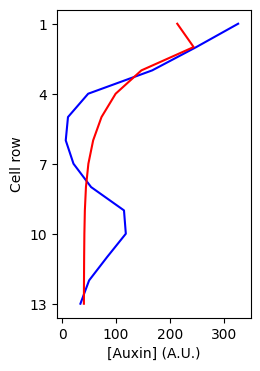

In [45]:
wt = pd.read_csv(path_UTGeff_single + 'auxin_profile_0_a.csv').head(13)
wt['x'] = data_x
cuc = pd.read_csv(path_UTGeff_single + 'auxin_profile_0_b.csv').head(13)
wt['x'], cuc['x'] = data_x, data_x

make_individual_plot(sample1_single=wt, sample2_single=cuc)

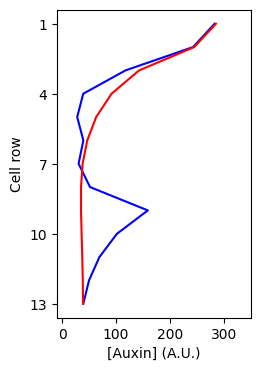

In [30]:
wt = pd.read_csv(path_DUAL_single + 'auxin_profile_0_a.csv').head(13)
wt['x'] = data_x
cuc = pd.read_csv(path_DUAL_single + 'auxin_profile_0_b.csv').head(13)
wt['x'], cuc['x'] = data_x, data_x

make_individual_plot(sample1_single=wt, sample2_single=cuc)

In [31]:
print(len(data_UTGeff))

3


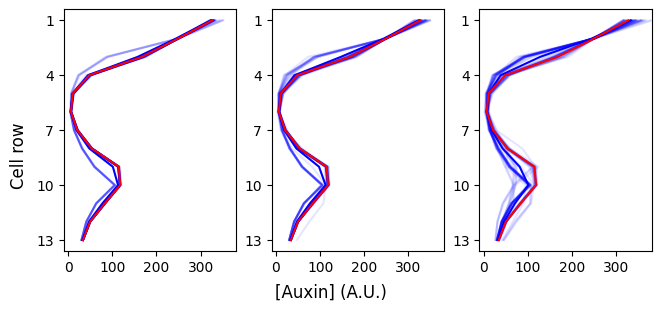

In [32]:
# Individual composite plot for UTGeff
fig3, axes = plt.subplots(1,len(noise_levels)-1, figsize=(0.5+len(noise_levels)*1.5,3), constrained_layout=True)
for data, ax in zip(data_UTGeff, axes.ravel()):
    for col in data.drop(columns=['model', 'noise', 'x']):
        ax.plot(data[col], data['x'], color='blue', alpha=.1)
for mean, ax in zip(all_means_UTGeff, axes.ravel()):
    ax.plot(mean, data_x, color='blue')
for ax in axes.ravel():
    ax.plot(UTGeff_single['0'], data_x, color='red')
for ax in axes.ravel():    
    ax.set_yticks([1,4,7,10,13])
    ax.invert_yaxis()
    ax.set_xlim(-10,380)   
fig3.supxlabel('[Auxin] (A.U.)')
fig3.supylabel('Cell row')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_comapre.png', bbox_inches='tight')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_compare.svg', bbox_inches='tight')

plt.show()

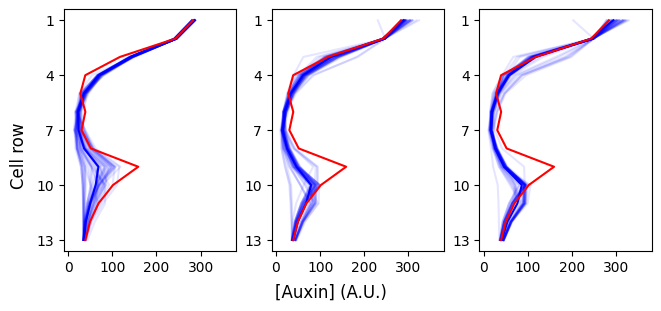

In [33]:
# Individual composite plot for DUAL

fig3, axes = plt.subplots(1,len(noise_levels)-1, figsize=(0.5+len(noise_levels)*1.5,3), constrained_layout=True)
for data, ax in zip(data_DUAL, axes.ravel()):
    for col in data.drop(columns=['model', 'noise', 'x']):
        ax.plot(data[col], data['x'], color='blue', alpha=.1)
for mean, ax in zip(all_means_DUAL, axes.ravel()):
    ax.plot(mean, data_x, color='blue')
for ax in axes.ravel():
    ax.plot(DUAL_single['0'], data_x, color='red')
for ax in axes.ravel():    
    ax.set_yticks([1,4,7,10,13])
    ax.invert_yaxis()
    ax.set_xlim(-10,380)   
fig3.supxlabel('[Auxin] (A.U.)')
fig3.supylabel('Cell row')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_comapre.png', bbox_inches='tight')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_compare.svg', bbox_inches='tight')

plt.show()

In [34]:
# Characterize peaks UTGeff
# Iterate over samples and replicates and extract metrics from the auxin site(s) that form(s) on the margin

def characterize_peaks(model, data):
    '''docstring'''

    all_peaks = pd.DataFrame(columns=['model', 'noise', 'sample', 'replica', 'pos', 'amplitude'])

    for sample_id, sample in enumerate(data):
        noise = noise_levels[sample_id]
        for replica in sample.drop(columns=['model', 'noise', 'x']):

            # Find pos a value of cell row with lowest auxin
            min_val = sample[replica].min()
            
            peaks = list(find_peaks(sample[replica], height = 1, threshold = 1, distance = 1))
            if len(peaks[0]) == 0:
                pass
            if len(peaks[0]) == 1:
                peak_position = data[0]['x'][peaks[0][0]] #peak_pos = sample['x'][peaks[0][0]]
                peak_height = peaks[1]['peak_heights'][0]
                all_peaks = all_peaks.append(pd.DataFrame({'model': model, 'noise': noise, 'sample': sample_id, 'replica': replica, 'pos': float(peak_position), 'amplitude': peak_height - min_val}, index=[0]), ignore_index=True)
            if len(peaks[0]) > 1:
                # Select peak with highest amplitude, excluding the peak that represents the tip of the leaf (cell row)
                # If distal auxin site (rows 0, 1, 2, 3) is detected as peak, remove it from the list of peaks. 
                if peaks[0][0] < 4:
                    peaks[0] = np.delete(peaks[0], 0)
                    peaks[1]['peak_heights'] = np.delete(peaks[1]['peak_heights'], 0)
                # Select highest peak
                max_height_value = np.amax(peaks[1]['peak_heights'])
                max_height_index = np.argmax(peaks[1]['peak_heights'])
                position = peaks[0][max_height_index]+1
                all_peaks = all_peaks.append(pd.DataFrame({'model': model, 'noise': noise, 'sample': sample_id, 'replica': replica, 'pos': float(position), 'amplitude': max_height_value - min_val}, index=[0]), ignore_index=True)
            
            troughs = list(find_peaks(-sample[replica], height = 1, threshold = 1, distance = 1))

    #all_peaks['pos'] = all_peaks['pos'].astype(int)
    #all_peaks[all_peaks['sample'] == 0]
    return(all_peaks)

In [35]:
peaks_UTGeff = characterize_peaks('UTGeff', data_UTGeff)
peaks_UTGeff

,model,noise,sample,replica,pos,amplitude
0,UTGeff,0,0,0,10.0,112.480840
1,UTGeff,0,0,1,10.0,110.083025
2,UTGeff,0,0,2,10.0,112.371401
3,UTGeff,0,0,3,10.0,101.537164
4,UTGeff,0,0,4,10.0,100.258555
...,...,...,...,...,...,...
134,UTGeff,10,2,45,9.0,68.673687
135,UTGeff,10,2,46,10.0,106.324941
136,UTGeff,10,2,47,10.0,110.116043
137,UTGeff,10,2,48,9.0,65.642309


In [36]:
peaks_DUAL = characterize_peaks('DUAL', data_DUAL)
peaks_DUAL

,model,noise,sample,replica,pos,amplitude
0,DUAL,0,0,0,9.0,47.534438
1,DUAL,0,0,1,9.0,84.700326
2,DUAL,0,0,2,10.0,75.574723
3,DUAL,0,0,3,10.0,52.427069
4,DUAL,0,0,5,9.0,74.833400
...,...,...,...,...,...,...
116,DUAL,10,2,45,10.0,57.842368
117,DUAL,10,2,46,10.0,78.714376
118,DUAL,10,2,47,10.0,78.303169
119,DUAL,10,2,48,10.0,77.646100


In [37]:
peaks_all = pd.concat([peaks_UTGeff, peaks_DUAL])

In [38]:
# Graph amplitude of peaks both models together

'''fig4, ax = plt.subplots(1,1, figsize=(10,4))
ax.set_ylim(0, 250)
sns.violinplot(data=peaks_all, x='sample', y=peaks_all.amplitude, hue=peaks_all.model, dodge=True, alpha=0.3, linewidth=0, color=(.9, .9, .9))
sns.pointplot(data=peaks_all, x='sample', y=peaks_all.amplitude, hue=peaks_all.model, dodge=True, ci='sd', linewidth=0, capsize=0, join=False, color='gray', scale=1, errwidth=2)
sns.swarmplot(data=peaks_all, x='sample', y=peaks_all.amplitude, hue=peaks_all.model, dodge=True, alpha=0.3, color='blue', size=4)
ax.set_ylabel('Amplitude of emergent auxin peak')
ax.set_xlabel('Noise amplitude in [Auxin] (%)')
ax.set_xticklabels(noise_levels)
ax.get_legend().remove()
plt.show()'''

"fig4, ax = plt.subplots(1,1, figsize=(10,4))\nax.set_ylim(0, 250)\nsns.violinplot(data=peaks_all, x='sample', y=peaks_all.amplitude, hue=peaks_all.model, dodge=True, alpha=0.3, linewidth=0, color=(.9, .9, .9))\nsns.pointplot(data=peaks_all, x='sample', y=peaks_all.amplitude, hue=peaks_all.model, dodge=True, ci='sd', linewidth=0, capsize=0, join=False, color='gray', scale=1, errwidth=2)\nsns.swarmplot(data=peaks_all, x='sample', y=peaks_all.amplitude, hue=peaks_all.model, dodge=True, alpha=0.3, color='blue', size=4)\nax.set_ylabel('Amplitude of emergent auxin peak')\nax.set_xlabel('Noise amplitude in [Auxin] (%)')\nax.set_xticklabels(noise_levels)\nax.get_legend().remove()\nplt.show()"

In [39]:
# Graph amplitude of peaks

def plot_amplitude_single_model(data, noise_levels):
    fig4, ax = plt.subplots(1,1, figsize=(5,4))
    ax.set_ylim(0, 250)
    sns.violinplot(data=data, x='sample', y=data.amplitude, alpha=0.3, size=3, linewidth=0, color=(.9, .9, .9))
    sns.pointplot(data=data, x='sample', y=data.amplitude, ci='sd', linewidth=0, capsize=0, join=False, color='gray', scale=1, errwidth=2)
    sns.swarmplot(data=data, x='sample', y=data.amplitude, alpha=0.3, color='blue', size=4)
    ax.set_ylabel('Amplitude of emergent auxin peak')
    ax.set_xlabel('Noise amplitude in [Auxin] (%)')
    ax.set_xticklabels(noise_levels)
    plt.show()

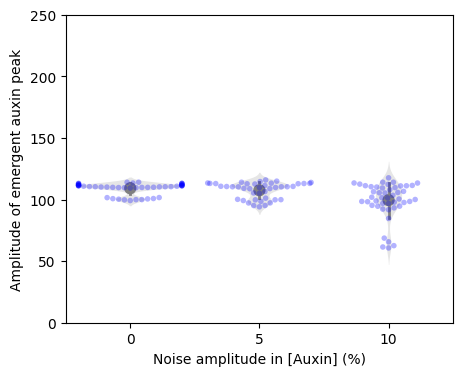

In [40]:
plot_amplitude_single_model(peaks_UTGeff[peaks_UTGeff['noise'] < 16], noise_levels[:3])

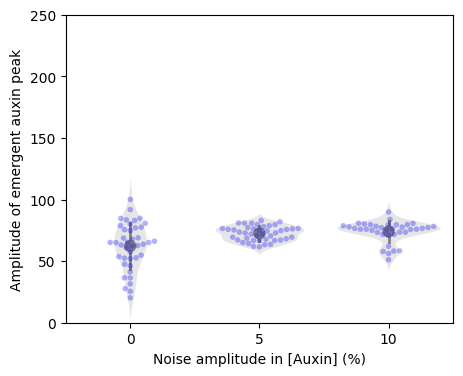

In [41]:
plot_amplitude_single_model(peaks_DUAL[peaks_DUAL['noise'] < 16], noise_levels[:3])

In [42]:
# Graph position of peaks

def plot_position_single_model(data, noise_levels):
    fig4, ax = plt.subplots(1,1, figsize=(5,4))
    ax.set_ylim(.5, 13.5)
    ax.invert_yaxis()
    sns.violinplot(data=data, x='sample', y=data.pos, alpha=0.3, size=3, linewidth=0, color=(.9, .9, .9))
    sns.pointplot(data=data, x='sample', y=data.pos, ci='sd', linewidth=0, capsize=0, join=False, color='gray', scale=1, errwidth=2)
    sns.swarmplot(data=data, x='sample', y=data.pos, alpha=0.3, color='blue', size=4)
    ax.set_ylabel('Position (cell row) of emergent auxin peak')
    ax.set_xlabel('Noise amplitude in [Auxin] (%)')
    ax.set_xticklabels(noise_levels)
    plt.show()

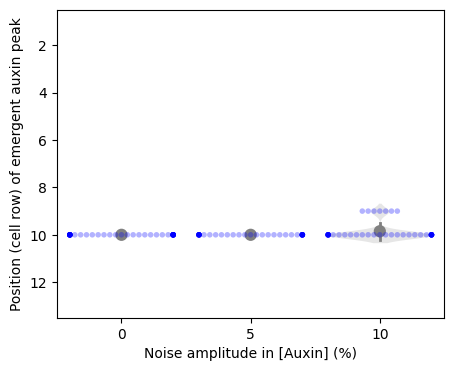

In [43]:
plot_position_single_model(peaks_UTGeff[peaks_UTGeff['noise'] < 16], noise_levels[:3])

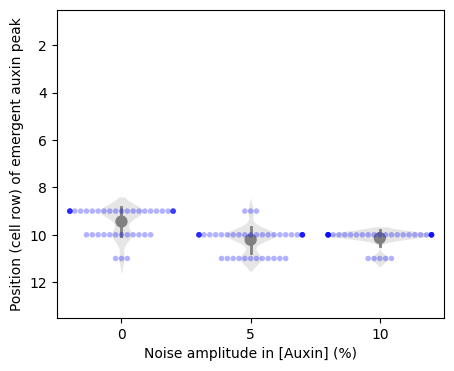

In [44]:
plot_position_single_model(peaks_DUAL[peaks_DUAL['noise'] < 16], noise_levels[:3])